In [ ]:
# In this challenge, you'll explore a real-world dataset containing flights data from the 
# US Department of Transportation.

# Let's start by loading and viewing the data.


In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/flights.csv"
df_flights = pd.read_csv(url)
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [ ]:
#The dataset contains observations of US domestic flights in 2013,
#and consists of the following fields:

# Year: The year of the flight (all records are from 2013)
# Month: The month of the flight
# DayofMonth: The day of the month on which the flight departed
# DayofMonth: The day of the month on which the flight departed
# DayOfWeek: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
# Carrier: The two-letter abbreviation for the airline.
# OriginAirportID: A unique numeric identifier for the departure aiport
# OriginAirportName: The full name of the departure airport
# OriginCity: The departure airport city
# OriginState: The departure airport state
# DestAirportID: A unique numeric identifier for the destination aiport
# DestAirportName: The full name of the destination airport
# DestCity: The destination airport city
# DestState: The destination airport state
# CRSDepTime: The scheduled departure time
# DepDelay: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
# DelDelay15: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
# CRSArrTime: The scheduled arrival time
# ArrDelay: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
# ArrDelay15: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
# Cancelled: A binary indicator that the flight was cancelled

# Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

#Start by cleaning the data.
#Identify any null or missing data, and impute appropriate replacement values.
#Identify and eliminate any outliers in the DepDelay and ArrDelay columns.
#Explore the cleaned data.
#View summary statistics for the numeric fields in the dataset.
#Determine the distribution of the DepDelay and ArrDelay columns.
#Use statistics, aggregate functions, and visualizations to answer the following questions:
#What are the average (mean) departure and arrival delays?
#How do the carriers compare in terms of arrival delay performance?
#Are some days of the week more prone to arrival days than others?
#Which departure airport has the highest average departure delay?
#Do late departures tend to result in longer arrival delays than on-time departures?
#Which route (from origin airport to destination airport) has the most late arrivals?
#Which route has the highest average arrival delay?


In [6]:
# 1. START BY CLEANING THE DATA

# Clean missing values
df_flights.isna()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
271936,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
271937,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
271938,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#When applied to the dataframe, the function returns a boolean dataframe with 
#True with element is missing value and False when it is not a missing value.
# However, since the data is quite vast, it is easier to get the count of missing values
# per each column in the dataframe.

df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [ ]:
# There are some null indicators for the 'late departures'

In [13]:
# We look at the delays for the ones with a null late indicator

df_flights[df_flights.isnull().any(axis=1)][['DepDelay','DepDel15','ArrDelay']]

,DepDelay,DepDel15,ArrDelay
171,0,NaN,0
359,0,NaN,0
429,0,NaN,0
545,0,NaN,0
554,0,NaN,0
...,...,...,...
271410,0,NaN,0
271607,0,NaN,0
271634,0,NaN,0
271671,0,NaN,0


In [14]:
#I will replace the missing 'DepDel15' indicator with a 0 and confirm that 
#there are no more missing values.

df_flights.DepDel15 = df_flights.DepDel15.fillna(0)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

DepDelay 
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00

ArrDelay 
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



/Users/makworo_nyabuti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/makworo_nyabuti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


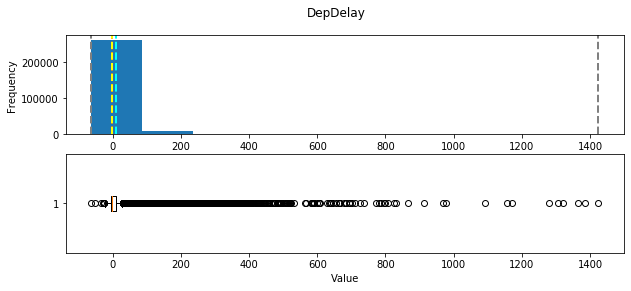

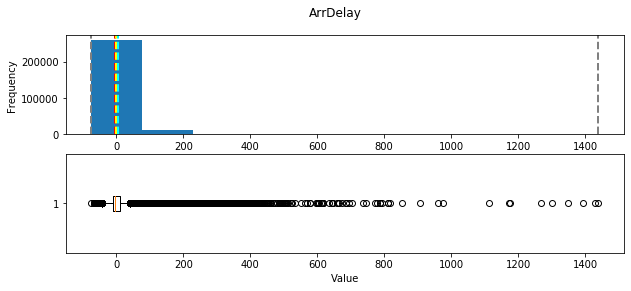

In [15]:
# Identify and eliminate any outliers in the DepDelay and ArrDelay columns.

# Function to show summary stats and distribution for a column
def show_distribution(var_data):
    from matplotlib import pyplot as plt
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(var_data.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()

# Call the function for each delay field
delayFields = ['DepDelay','ArrDelay']
for col in delayFields:
    show_distribution(df_flights[col])

DepDelay 
Minimum:-11.00
Mean:-0.92
Median:-2.00
Mode:-3.00
Maximum:16.00

ArrDelay 
Minimum:-32.00
Mean:-5.03
Median:-6.00
Mode:0.00
Maximum:37.00



/Users/makworo_nyabuti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/makworo_nyabuti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


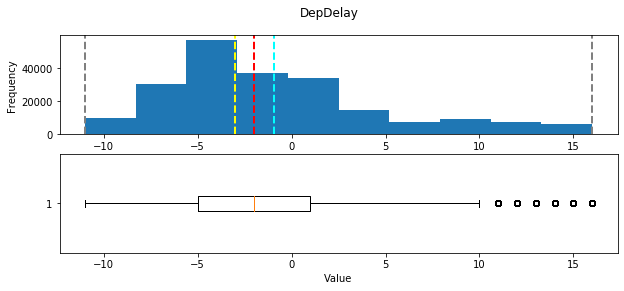

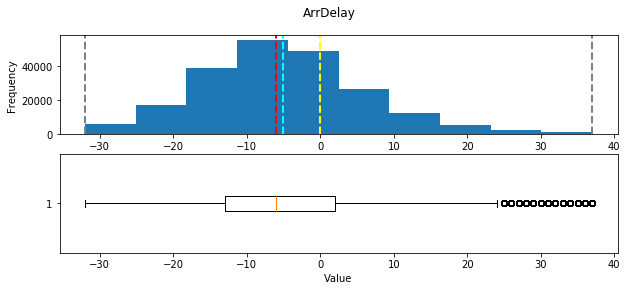

In [16]:
# There are outliers for both variables.
# We will then trim the data so that we include only rows where the values for these
# fields are within the 1st and the 90th percentile.

# Trim outliers for ArrDelay based on 1% and 80% percentiles
ArrDelay_1percentile = df_flights.ArrDelay.quantile(0.01)
ArrDelay_90percentile = df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90percentile]
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_1percentile]

# Trim outliers for DepDelay based on 1% and 90% percentiles
DepDelay_1percentile = df_flights.DepDelay.quantile(0.01)
DepDelay_90percentile = df_flights.DepDelay.quantile(0.90)
df_flights = df_flights[df_flights.DepDelay < DepDelay_90percentile]
df_flights = df_flights[df_flights.DepDelay > DepDelay_1percentile]

# View the revised distributions
for col in delayFields:
    show_distribution(df_flights[col])

In [17]:
# 2. EXPLORE THE CLEANED DATA

# a). View summary statistics for the numeric fields in the dataset.

# THe overall summary using describe function
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214397.0,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000
mean,2013.0,7.018368,15.794703,3.902737,12757.827661,12726.276147,1278.223879,-0.921692,0.018116,1461.406596,-5.030276,0.068602,0.013228
std,0.0,2.006398,8.859118,1.997744,1510.058629,1506.251757,469.440262,5.708594,0.133371,485.676457,11.424280,0.252776,0.114249
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,0.000000,1054.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1235.000000,-2.000000,0.000000,1445.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1655.000000,1.000000,0.000000,1845.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,16.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


In [18]:

# b). Determine the distribution of the DepDelay and ArrDelay columns

def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of DepDelay and ArrDelay
show_density(col)

NameError: name 'plt' is not defined

In [19]:
# c). What are the average (mean) departure and arrival delays?
df_flights[delayFields].mean()


DepDelay   -0.921692
ArrDelay   -5.030276
dtype: float64

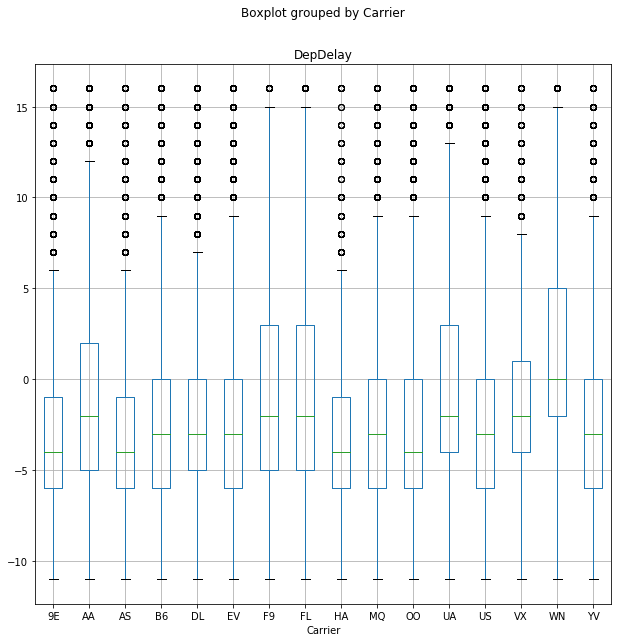

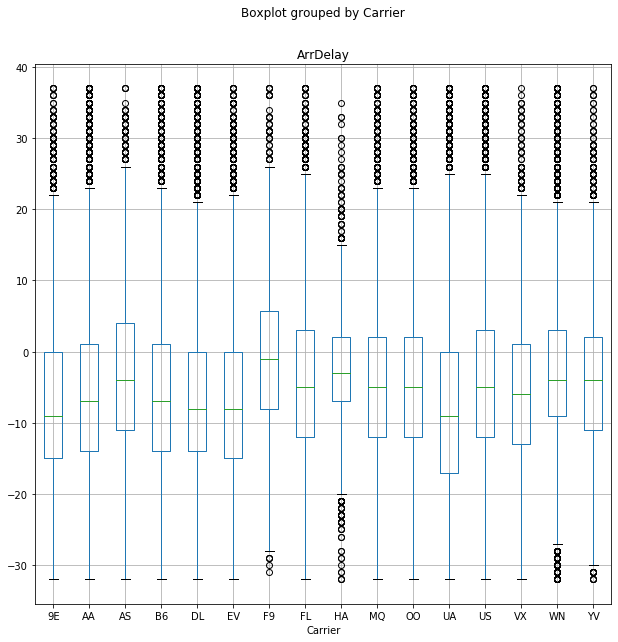

In [20]:
# d). How do the carriers compare in terms of arrival delay performance?

for col in delayFields:
    df_flights.boxplot(column=col, by='Carrier', figsize=(10,10))

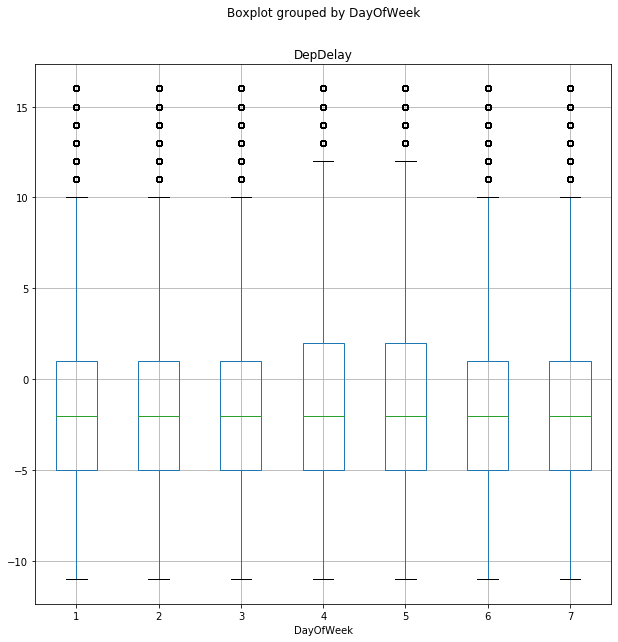

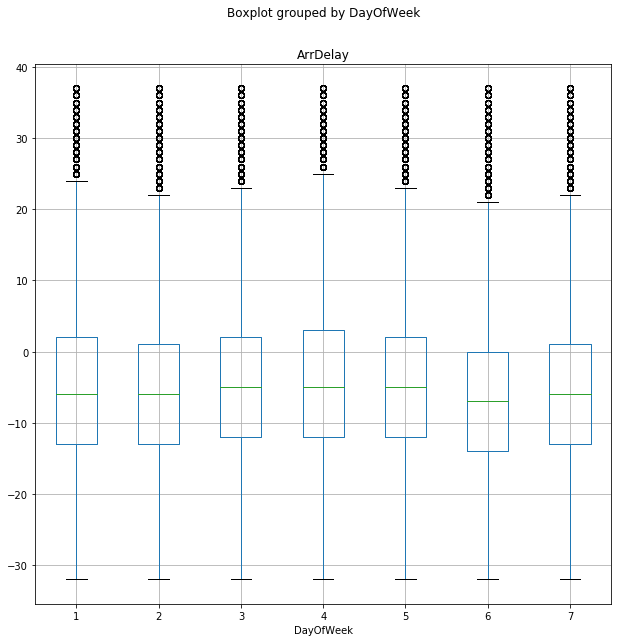

In [21]:
# e). Is there a noticable difference in arrival delays for different days of the week?

for col in delayFields:
    df_flights.boxplot(column=col, by='DayOfWeek', figsize=(10,10))

,DepDelay
OriginAirportName,
Chicago Midway International,2.365960
Dallas Love Field,2.148798
William P Hobby,1.561927
Metropolitan Oakland International,0.964853
Denver International,0.807272
...,...
Memphis International,-2.962737
Tucson International,-2.989154
Ted Stevens Anchorage International,-3.149758


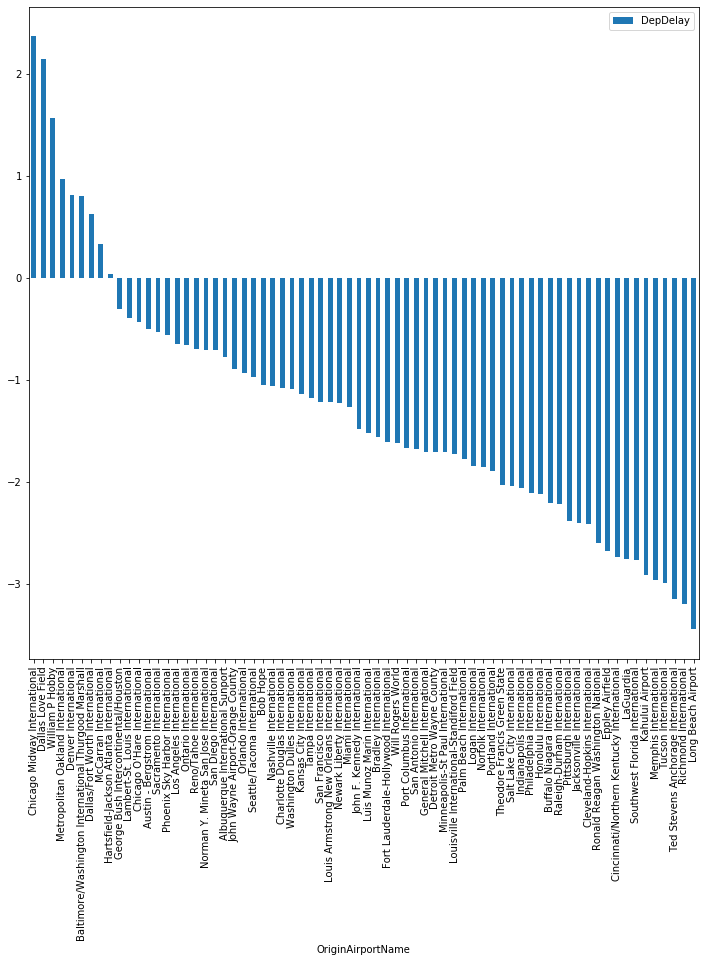

In [22]:
# f). Which departure airport has the highest average departure delay?

departure_airport_group = df_flights.groupby(df_flights.OriginAirportName)

mean_departure_delays = pd.DataFrame(departure_airport_group['DepDelay'].mean()).sort_values('DepDelay', ascending=False)
mean_departure_delays.plot(kind = "bar", figsize=(12,12))
mean_departure_delays

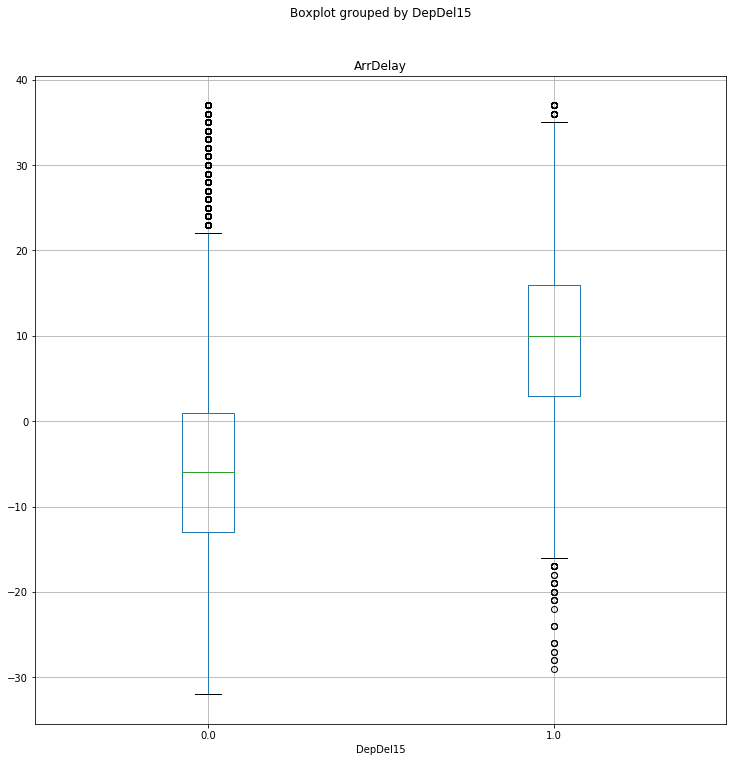

In [23]:
# g). Do late departures tend to result in longer arrival delays than on-time departures?

df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(12,12))

In [24]:
# h). Which route (from origin airport to destination airport) has the most late arrivals?

# Add a routes column
routes  = pd.Series(df_flights['OriginAirportName'] + ' > ' + df_flights['DestAirportName'])
df_flights = pd.concat([df_flights, routes.rename("Route")], axis=1)

# Group by routes
route_group = df_flights.groupby(df_flights.Route)
pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
San Francisco International > Los Angeles International,90
Los Angeles International > San Francisco International,69
LaGuardia > Hartsfield-Jackson Atlanta International,68
Los Angeles International > John F. Kennedy International,52
LaGuardia > Charlotte Douglas International,51
...,...
Logan International > Austin - Bergstrom International,0
Logan International > Memphis International,0
Logan International > Port Columbus International,0


In [25]:
# i). Which route has the highest average arrival delay?

pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Route,
Louis Armstrong New Orleans International > Ronald Reagan Washington National,24.500000
Cleveland-Hopkins International > Palm Beach International,18.000000
John F. Kennedy International > Louisville International-Standiford Field,18.000000
Cleveland-Hopkins International > Philadelphia International,12.800000
Memphis International > Denver International,9.758621
...,...
Lambert-St. Louis International > Cleveland-Hopkins International,-20.000000
Eppley Airfield > LaGuardia,-20.750000
Denver International > Kahului Airport,-22.666667
